In [1]:
import pandas as pd

I- Préparation des données 

In [2]:
data = pd.read_csv("Data_Arbre.csv")
colomns = ["haut_tot", "longitude", "latitude"]
print(data[colomns])

reduit = data[colomns].dropna() # pour enlever les autres colonnes pas pertinentes

      haut_tot  longitude   latitude
0          6.0   3.293264  49.840500
1         13.0   3.273380  49.861409
2         12.0   3.289068  49.844513
3         16.0   3.302387  49.861778
4          5.0   3.304047  49.858446
...        ...        ...        ...
7404       3.0   3.283505  49.848695
7405       3.0   3.283436  49.848682
7406       3.0   3.297078  49.860413
7407       3.0   3.291685  49.848009
7408       3.0   3.301788  49.861503

[7409 rows x 3 columns]


In [3]:
X = reduit[['haut_tot']].values # recuperer les données de hauteur totale 
print(X)

[[ 6.]
 [13.]
 [12.]
 ...
 [ 3.]
 [ 3.]
 [ 3.]]


II-Apprentissage non supervisé

c:\Users\anais\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1077: ConvergenceWarning: Number of distinct clusters (38) found smaller than n_clusters (39). Possibly due to duplicate points in X.
  return self.fit(X, sample_weight=sample_weight).labels_
c:\Users\anais\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1077: ConvergenceWarning: Number of distinct clusters (38) found smaller than n_clusters (40). Possibly due to duplicate points in X.
  return self.fit(X, sample_weight=sample_weight).labels_
c:\Users\anais\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1077: ConvergenceWarning: Number of distinct clusters (38) found smaller than n_clusters (41). Possibly due to duplicate points in X.
  return self.fit(X, sample_weight=sample_weight).labels_
c:\Users\anais\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1077: ConvergenceWarning: Number of distinct clusters (38) found smaller than n_clusters (42). Possibly due to duplicate points in X.
  return s

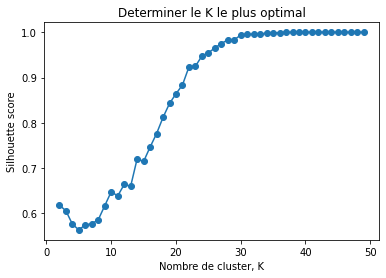

Le meilleur nombre de cluster est : 38


In [4]:
import numpy as np
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt

# Plage de valeurs de K à tester
range_n_clusters = list(range(2, 50))
silhouette_avg = []

for num_clusters in range_n_clusters:
    # Initialisation de KMeans avec `num_clusters`
    kmeans = KMeans(n_clusters=num_clusters, random_state=10)
    
    # Fit et prédictions
    cluster_labels = kmeans.fit_predict(X)
    
    # Calcul du score de silhouette
    score = silhouette_score(X, cluster_labels)
    silhouette_avg.append(score)

# Tracer les scores de silhouette pour chaque valeur de K
plt.plot(range_n_clusters, silhouette_avg, marker='o')
plt.xlabel('Nombre de cluster, K')
plt.ylabel('Silhouette score')
plt.title('Determiner le K le plus optimal')
plt.show()

# Trouver le K qui maximise le score de silhouette
best_k = range_n_clusters[np.argmax(silhouette_avg)]
print(f'Le meilleur nombre de cluster est :', best_k)


In [5]:
from sklearn.cluster import KMeans

nb_clusters = 2
kmeans = KMeans (n_clusters=nb_clusters, random_state=0).fit(X)

III-Métriques pour l'Apprentissage Non Supervisé

In [6]:
from sklearn.metrics import silhouette_score
from sklearn.metrics import davies_bouldin_score
from sklearn.metrics import calinski_harabasz_score

silhouette = silhouette_score(X, kmeans.labels_)
davies_bouldin = davies_bouldin_score(X,kmeans.labels_)
calinski = calinski_harabasz_score(X, kmeans.labels_)

print('Silhouette score : ', silhouette)
print('Score Davies Bouldin: ', davies_bouldin)
print('Score de Calinski Harabasz : ', calinski)


Silhouette score :  0.6183070397058011
Score Davies Bouldin:  0.5327731513733844
Score de Calinski Harabasz :  17209.603803596143


IV- Visualisation sur carte

In [20]:
import plotly.express as px


fig = px.scatter_mapbox(
    reduit,
    lat = 'latitude',
    lon ='longitude',
    hover_name = 'haut_tot',

    zoom = 12,
    height = 600, 
)

fig.update_layout(mapbox_style = "open-street-map")
fig.update_layout(margin = {"r":0,"t":0,"l":0,"b":0})
fig.show()

V- Préparation du script 